In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
def plot_data(name,data, list_of_candidates):
    data['Liczba wyborców uprawnionych do głosowania']=data['Liczba wyborców uprawnionych do głosowania']\
                                                            .replace(['-'],'0').astype(int)
    data['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów']=data['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów']\
                                                                                .replace(['-'],'0').astype(int)
    data = data[data['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów']>0]

    fig = plt.figure()
    fig.set_size_inches(15, 10, forward=True)
    fig.show()
    ax=fig.add_subplot(111)
    for c in list_of_candidates:
        voices=[0]*100
        for index, row in data.iterrows():
            att= row['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów']\
               / row['Liczba wyborców uprawnionych do głosowania']
            if att>0:
                index=int(att*100)
                if index>=0 and index<100:
                    voices[index] += float(row[c])/1000
                    pass
                pass
            pass
        ax.plot(list(range(100)),voices, label=c)
        pass
    ax.title.set_text(name + ". Roskład głosów")
    ax.set_xlabel("frekwencja w obwodzie, proc.")
    ax.set_ylabel("tysiące głosów \n na 1 proc. frekwencji")
    ax.legend(loc=2)

    plt.draw()

    fig = plt.figure()
    fig.set_size_inches(15 , 10*len(list_of_candidates), forward=True)
    fig.show()
    index=0
    attendance=100 * data['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów']\
                   / data['Liczba wyborców uprawnionych do głosowania']
    for c in list_of_candidates:
        index+=1
        ax = fig.add_subplot(100*len(list_of_candidates)+10+index)
        data[c]=data[c].replace(['-'],'0')
        voices= 100 * data[c].astype(int) / data['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów'].astype(int)
        ax.hist2d(attendance, voices, bins=[50,50], norm=mcolors.PowerNorm(0.5))
        ax.title.set_text(name + ". Roskład obwodów")
        ax.set_xlabel("frekwencja")
        ax.set_ylabel("procenty głosów na \n"+c)
        pass
    plt.draw()
    pass

    

In [2]:
data2020_1=pd.read_csv("2020_1.csv", sep=';')
data2020_1.columns

Index(['Symbol kontrolny', 'Nr OKW', 'Kod TERYT', 'Typ gminy', 'Numer obwodu',
       'Typ obszaru', 'Typ obwodu', 'Siedziba', 'Gmina', 'Powiat',
       'Województwo', 'Komisje obwodowe otrzymały kart do głosowania',
       'Liczba wyborców uprawnionych do głosowania',
       'Nie wykorzystano kart do głosowania',
       'Liczba wyborców, którym wydano karty do głosowania',
       'Liczba wyborców głosujących przez pełnomocnika',
       'Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania',
       'Liczba wyborców, którym wysłano pakiety wyborcze',
       'Liczba otrzymanych kopert zwrotnych',
       'Liczba kopert zwrotnych, w których nie było oświadczenia o osobistym i tajnym oddaniu głosu',
       'Liczba kopert zwrotnych, w których oświadczenie nie było podpisane',
       'Liczba kopert zwrotnych, w których nie było koperty na kartę do głosowania',
       'Liczba kopert zwrotnych, w których znajdowała się niezaklejona koperta na kartę do głosowania',
     

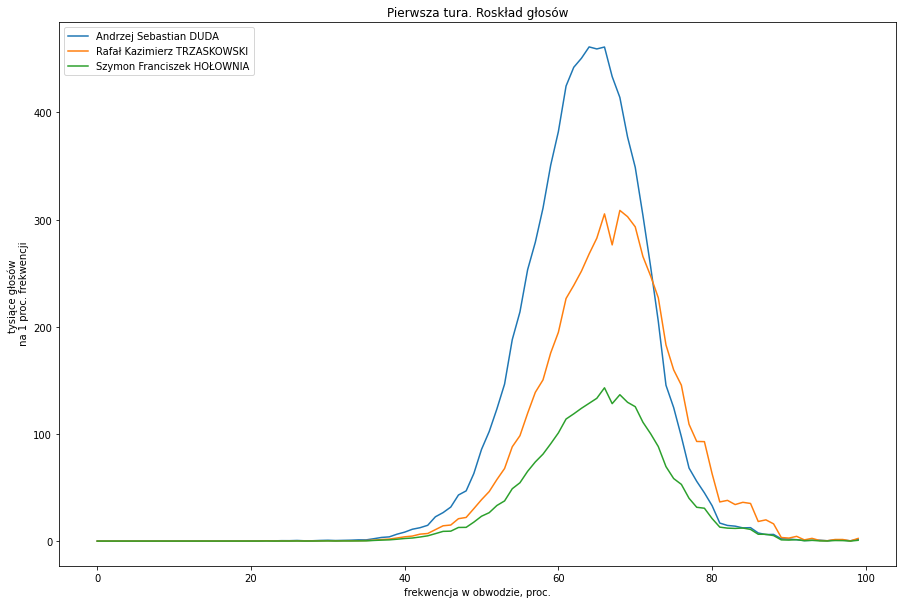

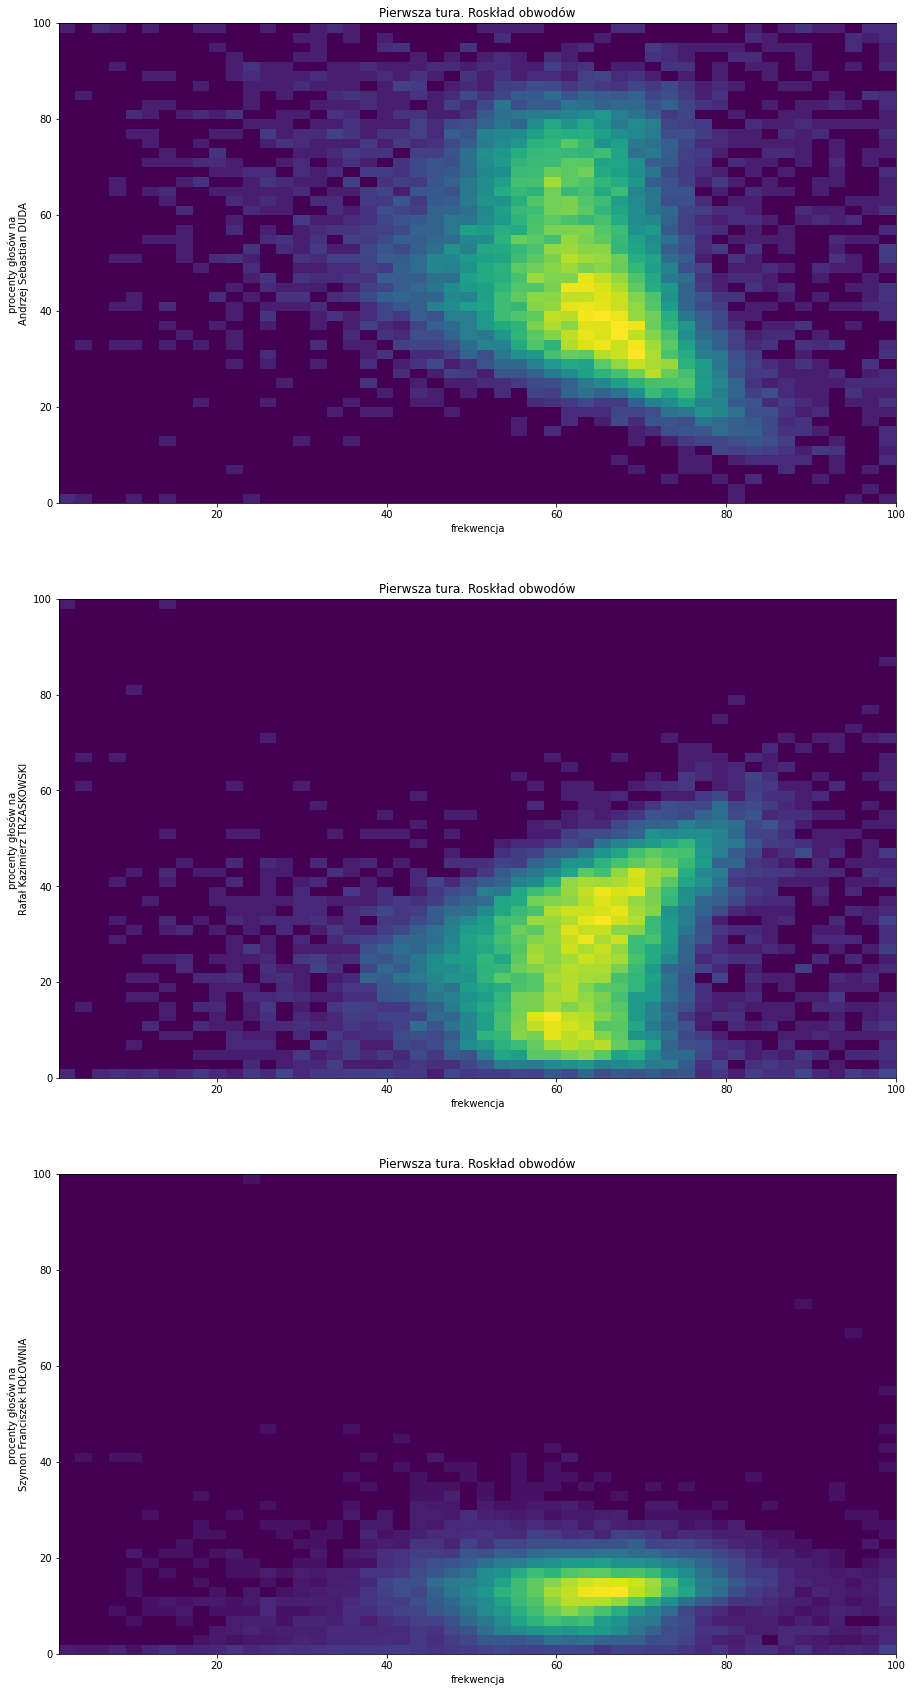

In [3]:
plot_data("Pierwsza tura",data2020_1,['Andrzej Sebastian DUDA', 'Rafał Kazimierz TRZASKOWSKI','Szymon Franciszek HOŁOWNIA'])

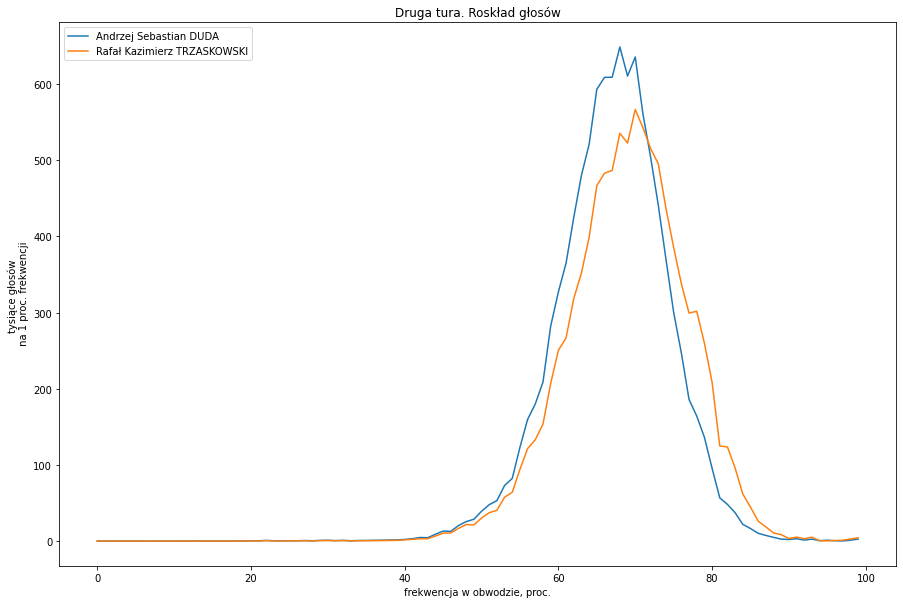

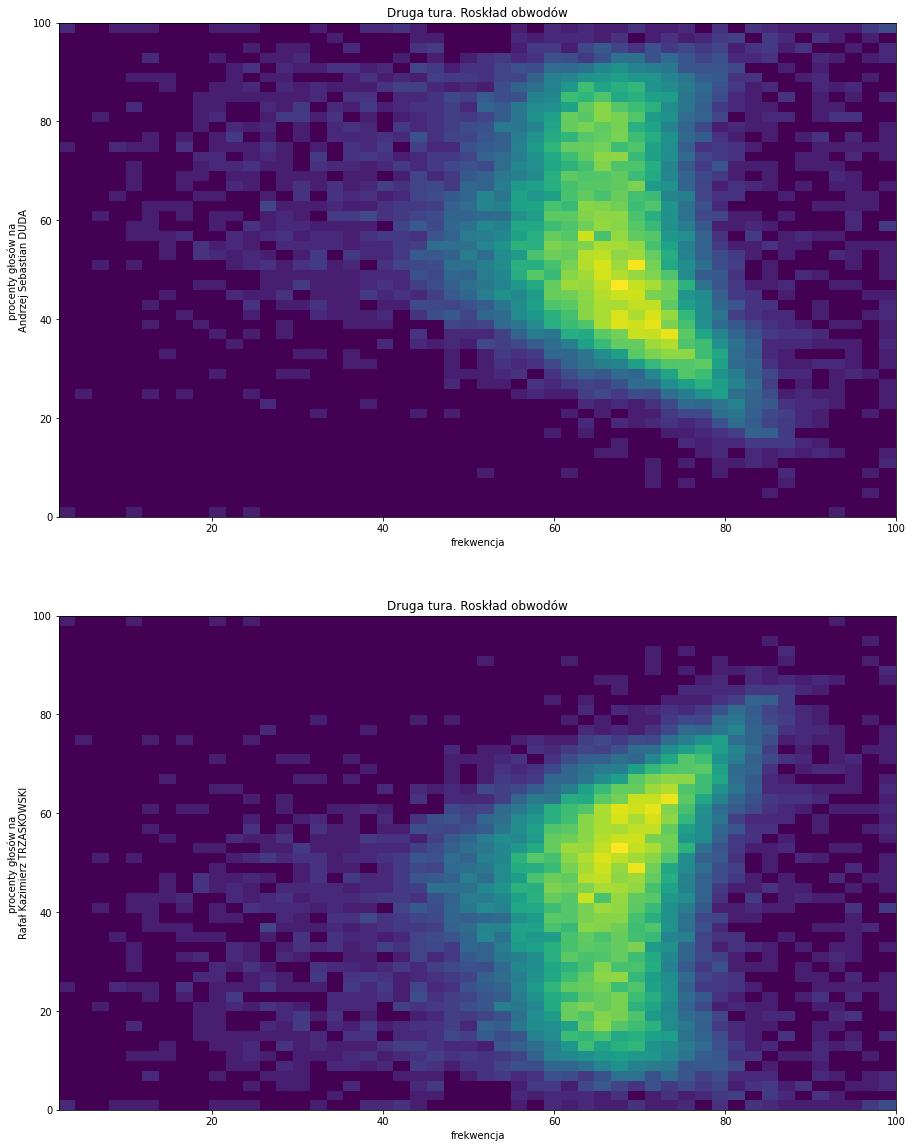

In [4]:
data2020_2=pd.read_csv("2020_2.csv", sep=';')
plot_data("Druga tura",data2020_2,['Andrzej Sebastian DUDA', 'Rafał Kazimierz TRZASKOWSKI'])

In [5]:
#for t in data2020_2['Typ obszaru'].unique():
#    plot_data(t,data2020_2,['Andrzej Sebastian DUDA', 'Rafał Kazimierz TRZASKOWSKI'])

In [6]:
#for t in data2020_2['Województwo'].unique():
#    plot_data(t,data2020_2,['Andrzej Sebastian DUDA', 'Rafał Kazimierz TRZASKOWSKI'])